In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab \Notebooks/microscopy_self_supervised_learning/

/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning


In [3]:
!ls

data  models  notebooks  README.md  results


Imports

In [4]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

%matplotlib inline

Data Paths

In [5]:
DATA_DIR = "data/raw"
METADATA_PATH = "data/metadata/BBBC021_v1_image.csv"

print("Plates:", os.listdir(DATA_DIR))

Plates: ['Week1_22161', 'Week1_22123', 'Week1_22141', 'text.txt']


Load Meta Data

In [6]:
metadata = pd.read_csv(METADATA_PATH)
metadata.head()

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration
0,4,233,G10_s1_w1BEDC2073-A983-4B98-95E9-84466707A25D.tif,Week4/Week4_27481,G10_s1_w2DCEC82F3-05F7-4F2F-B779-C5DF9698141E.tif,Week4/Week4_27481,G10_s1_w43CD51CBC-2370-471F-BA01-EE250B14B3C8.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
1,4,234,G10_s2_w11C3B9BCC-E48F-4C2F-9D31-8F46D8B5B972.tif,Week4/Week4_27481,G10_s2_w2570437EF-C8DC-4074-8D63-7FA3A7271FEE.tif,Week4/Week4_27481,G10_s2_w400B21F33-BDAB-4363-92C2-F4FB7545F08C.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
2,4,235,G10_s3_w1F4FCE330-C71C-4CA3-9815-EAF9B9876EB5.tif,Week4/Week4_27481,G10_s3_w2194A9AC7-369B-4D84-99C0-DA809B0042B8.tif,Week4/Week4_27481,G10_s3_w4E0452054-9FC1-41AB-8C5B-D0ACD058991F.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
3,4,236,G10_s4_w1747818B4-FFA7-40EE-B0A0-6A5974AF2644.tif,Week4/Week4_27481,G10_s4_w298D4652F-B5BF-49F2-BE51-8149DF83EAFD.tif,Week4/Week4_27481,G10_s4_w42648D36D-6B77-41CD-B520-6E4C533D9ABC.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
4,4,473,G10_s1_w10034568D-CC12-43C3-93A9-DC3782099DD3.tif,Week4/Week4_27521,G10_s1_w2A29ED14B-952C-4BA1-89B9-4F92B6DADEB4.tif,Week4/Week4_27521,G10_s1_w4DAA2E9D1-F6E9-45FA-ADC0-D341B647A680.tif,Week4/Week4_27521,Week4_27521,G10,2,5-fluorouracil,0.003


In [7]:
#Creating a subset of the metadata that corresponds with the subset of the data that will be worked on
subset_metadata = metadata[
    metadata["Image_Metadata_Plate_DAPI"].isin([
        "Week1_22123",
        "Week1_22141",
        "Week1_22161"
    ])
]

subset_metadata.head()

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration
672,1,73,Week1_150607_C10_s1_w171173D63-FDAC-457A-9E33-...,Week1/Week1_22123,Week1_150607_C10_s1_w29DCB015C-38C2-41D2-A798-...,Week1/Week1_22123,Week1_150607_C10_s1_w48B202CFA-2040-4647-8F8B-...,Week1/Week1_22123,Week1_22123,C10,1,aphidicolin,0.003
673,1,74,Week1_150607_C10_s2_w1F8662EC0-CF27-49A0-9A38-...,Week1/Week1_22123,Week1_150607_C10_s2_w2CB579351-A311-4D82-A4F4-...,Week1/Week1_22123,Week1_150607_C10_s2_w47AA580AF-DFBB-4C81-B01C-...,Week1/Week1_22123,Week1_22123,C10,1,aphidicolin,0.003
674,1,75,Week1_150607_C10_s3_w10252F34C-B9EA-4515-ACDA-...,Week1/Week1_22123,Week1_150607_C10_s3_w28A6A7E22-60C3-46B1-983D-...,Week1/Week1_22123,Week1_150607_C10_s3_w4950BFBAE-7828-415B-B604-...,Week1/Week1_22123,Week1_22123,C10,1,aphidicolin,0.003
675,1,76,Week1_150607_C10_s4_w1D47B6FCE-5480-4D6E-A014-...,Week1/Week1_22123,Week1_150607_C10_s4_w29A2EEDA6-0A8A-4C8B-A508-...,Week1/Week1_22123,Week1_150607_C10_s4_w473E67441-A601-4A48-956D-...,Week1/Week1_22123,Week1_22123,C10,1,aphidicolin,0.003
676,1,313,Week1_150607_C10_s1_w1D4849932-75DE-492F-989F-...,Week1/Week1_22141,Week1_150607_C10_s1_w23003D9C6-159A-4518-AA66-...,Week1/Week1_22141,Week1_150607_C10_s1_w45847CDEF-6F67-4881-8A4B-...,Week1/Week1_22141,Week1_22141,C10,2,aphidicolin,0.003


Sanity Check

In [8]:
subset_metadata.columns

Index(['TableNumber', 'ImageNumber', 'Image_FileName_DAPI',
       'Image_PathName_DAPI', 'Image_FileName_Tubulin',
       'Image_PathName_Tubulin', 'Image_FileName_Actin',
       'Image_PathName_Actin', 'Image_Metadata_Plate_DAPI',
       'Image_Metadata_Well_DAPI', 'Replicate', 'Image_Metadata_Compound',
       'Image_Metadata_Concentration'],
      dtype='object')

In [9]:
#sanity check
subset_metadata["Image_Metadata_Plate_DAPI"].value_counts()

,count
Image_Metadata_Plate_DAPI,
Week1_22123,240
Week1_22141,240
Week1_22161,240


In [10]:
#Need to add MOA metadata
MOA_META_DATA_PATH = "data/metadata/BBBC021_v1_moa.csv"
moa = pd.read_csv(MOA_META_DATA_PATH)
moa.head()

,compound,concentration,moa
0,PP-2,3.0,Epithelial
1,emetine,0.3,Protein synthesis
2,AZ258,1.0,Aurora kinase inhibitors
3,cytochalasin B,10.0,Actin disruptors
4,ALLN,3.0,Protein degradation


In [11]:
#comparing the compunds in both data
subset_metadata["Image_Metadata_Compound"].value_counts()

,count
Image_Metadata_Compound,
taxol,168
cytochalasin B,96
aphidicolin,96
nocodazole,96
AZ-A,96
AZ-H,96
DMSO,72


In [12]:
moa["compound"].value_counts()

,count
compound,
AZ-C,7
vincristine,7
AZ-A,6
AZ138,5
mitomycin C,4
demecolcine,4
AZ258,3
simvastatin,3
AZ-U,3


We did filter out a lot of data from the meta data as we are only dealing with 3 plates of Week 1.

In [13]:
#Lets merge the two together for exploration and processing
full_meta = subset_metadata.merge(
    moa,
    left_on=["Image_Metadata_Compound", "Image_Metadata_Concentration"],
    right_on=["compound", "concentration"],
    how="inner"
)
full_meta.shape

(300, 16)

In [14]:
full_meta.head()

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,compound,concentration,moa
0,1,11,Week1_150607_B04_s3_w135D66B4C-0548-4AB8-A57B-...,Week1/Week1_22123,Week1_150607_B04_s3_w2D81AEFB9-9DD4-4B59-9177-...,Week1/Week1_22123,Week1_150607_B04_s3_w408BE006A-BF34-457E-81A9-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
1,1,12,Week1_150607_B04_s4_w1EB720AD1-83BA-48A7-8C47-...,Week1/Week1_22123,Week1_150607_B04_s4_w261B79A05-7534-46F3-8C80-...,Week1/Week1_22123,Week1_150607_B04_s4_w49FF7E7B1-F049-4994-BCA2-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
2,1,9,Week1_150607_B04_s1_w11323931B-BDA7-4F42-870E-...,Week1/Week1_22123,Week1_150607_B04_s1_w2F8F7EA7A-EC57-49CA-A556-...,Week1/Week1_22123,Week1_150607_B04_s1_w494DCA5C4-3531-497D-A8B0-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
3,1,10,Week1_150607_B04_s2_w1F649C703-6FA8-406F-8575-...,Week1/Week1_22123,Week1_150607_B04_s2_w2802CC81E-56F9-41C5-A6C2-...,Week1/Week1_22123,Week1_150607_B04_s2_w4342F300D-60F8-4256-A637-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
4,1,251,Week1_150607_B04_s3_w1B0B8AAC7-F2AD-4756-939C-...,Week1/Week1_22141,Week1_150607_B04_s3_w25C7FD77E-FDC4-471F-A512-...,Week1/Week1_22141,Week1_150607_B04_s3_w42BD03411-D32F-4179-A6C5-...,Week1/Week1_22141,Week1_22141,B04,2,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors


In [15]:
full_meta['moa'].value_counts()

,count
moa,
Microtubule stabilizers,108
DMSO,72
Aurora kinase inhibitors,72
Actin disruptors,24
Microtubule destabilizers,24


In [16]:
full_meta['moa'].isna().sum() #any NaNs

np.int64(0)

In [17]:
print("Total images:", len(full_meta))
print("Unique compounds:", full_meta['Image_Metadata_Compound'].nunique())
print("MOA-labeled samples:", full_meta['moa'].notna().sum())

Total images: 300
Unique compounds: 5
MOA-labeled samples: 300


Data Exploration

In [18]:
import os
os.makedirs("../results/figures", exist_ok=True)

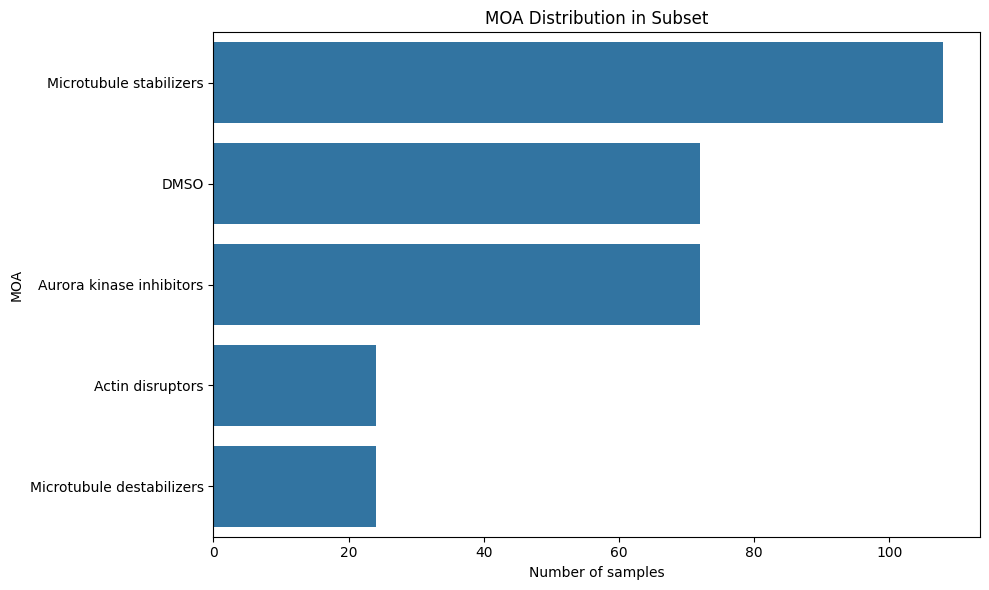

In [ ]:
#Bar plot of MOA distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=full_meta, y="moa", order=full_meta["moa"].value_counts().index)
plt.title("MOA Distribution in Subset")
plt.xlabel("Number of samples")
plt.ylabel("MOA")

plt.tight_layout()
plt.savefig(r"results/figures/moa_distribution.png", dpi=300)
plt.show()

Conclusion: It doesnt look very balanced.

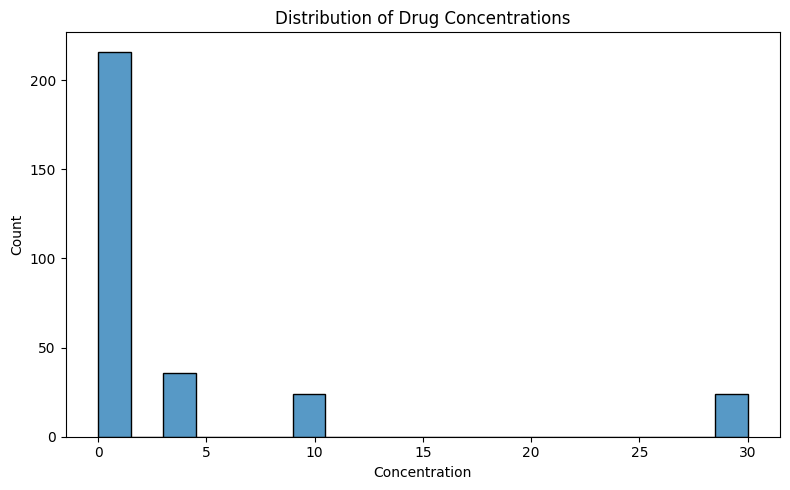

In [ ]:
#Histogram of concentrations
plt.figure(figsize=(8,5))
sns.histplot(full_meta["Image_Metadata_Concentration"], bins=20)
plt.title("Distribution of Drug Concentrations")
plt.xlabel("Concentration")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig(r"results/figures/concentration_histogram.png", dpi=300)
plt.show()

Conclusion : Not a very well spread dosing either

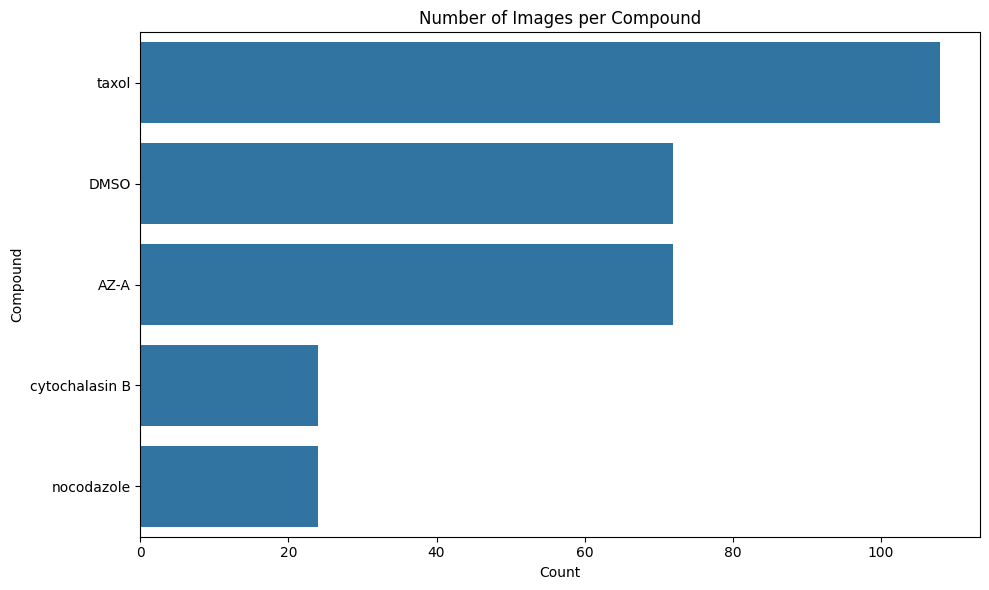

In [ ]:
# Count per compound (bar plot)
compound_counts = full_meta["Image_Metadata_Compound"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=compound_counts.values, y=compound_counts.index)
plt.title("Number of Images per Compound")
plt.xlabel("Count")
plt.ylabel("Compound")

plt.tight_layout()
plt.savefig(r"results/figures/compound_counts.png", dpi=300)
plt.show()

Conclusion : Shows data imbalance between compounds

In [20]:
import tifffile as tiff
import os
import matplotlib.pyplot as plt

row = full_meta.iloc[0]

def fix_path(pathname):
    # keep only last folder name
    return pathname.split("/")[-1]

base_dir = "/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/raw"

paths = [
    os.path.join(base_dir, fix_path(row["Image_PathName_DAPI"]), row["Image_FileName_DAPI"]),
    os.path.join(base_dir, fix_path(row["Image_PathName_Tubulin"]), row["Image_FileName_Tubulin"]),
    os.path.join(base_dir, fix_path(row["Image_PathName_Actin"]), row["Image_FileName_Actin"])
]

print(paths)  # debug check

['/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/raw/Week1_22123/Week1_150607_B04_s3_w135D66B4C-0548-4AB8-A57B-9CC39666813B.tif', '/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/raw/Week1_22123/Week1_150607_B04_s3_w2D81AEFB9-9DD4-4B59-9177-2093F0815C94.tif', '/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/raw/Week1_22123/Week1_150607_B04_s3_w408BE006A-BF34-457E-81A9-FAB019FE8996.tif']


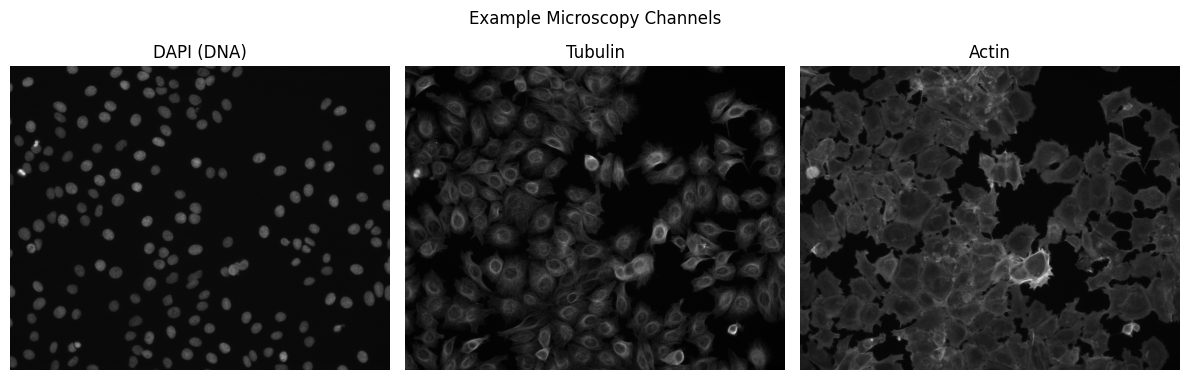

In [ ]:
# Example images (5-channel or 3-channel)
import tifffile as tiff
import numpy as np

row = subset_metadata.iloc[0]

paths = [
    os.path.join(base_dir, fix_path(row["Image_PathName_DAPI"]), row["Image_FileName_DAPI"]),
    os.path.join(base_dir, fix_path(row["Image_PathName_Tubulin"]), row["Image_FileName_Tubulin"]),
    os.path.join(base_dir, fix_path(row["Image_PathName_Actin"]), row["Image_FileName_Actin"])
]
images = [tiff.imread(p) for p in paths]

fig, axes = plt.subplots(1,3, figsize=(12,4))

titles = ["DAPI (DNA)", "Tubulin", "Actin"]

for i in range(3):
    axes[i].imshow(images[i], cmap="gray")
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.suptitle("Example Microscopy Channels")
plt.tight_layout()
plt.savefig(r"results/figures/example_channels.png", dpi=300)
plt.show()

These plots show the distribution of compounds, concentrations, and biological mechanisms of action (MOA) in the selected subset. Example microscopy images demonstrate the three fluorescent channels (DNA, tubulin, actin), highlighting morphological differences induced by drug treatments.

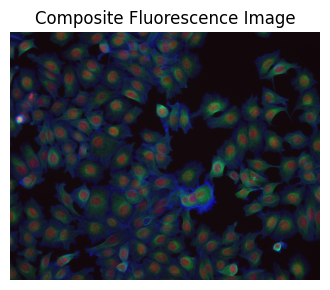

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rgb = np.stack([
    images[0] / images[0].max(),   # DAPI
    images[1] / images[1].max(),   # Tubulin
    images[2] / images[2].max()    # Actin
], axis=-1)

plt.figure(figsize=(4,4))
plt.imshow(rgb)
plt.title("Composite Fluorescence Image")
plt.axis("off")
plt.savefig(r"results/figures/composite_example.png", dpi=300)
plt.show()

We visualize representative microscopy images from the BBBC021 dataset, showing three fluorescent channels: DAPI (nuclear DNA), Tubulin (microtubules), and Actin (cytoskeleton). These channels capture complementary morphological features that reflect cellular responses to different drug perturbations.

In [21]:
#Image intensity statistics (sanity check)
# Check if channels differ in brightness / noise.
import numpy as np
import tifffile as tiff

row = subset_metadata.iloc[0]
base_dir = "/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/raw"
sample_path = os.path.join(base_dir, fix_path(row["Image_PathName_DAPI"]), row["Image_FileName_DAPI"]),


img = tiff.imread(sample_path)

print("Min:", img.min())
print("Max:", img.max())
print("Mean:", img.mean())
print("Std:", img.std())

Min: 240
Max: 7280
Mean: 751.1171875
Std: 529.6127066825246


In [22]:
# for 3 chennels
paths = [
    os.path.join(base_dir, fix_path(row["Image_PathName_DAPI"]), row["Image_FileName_DAPI"]),
    os.path.join(base_dir, fix_path(row["Image_PathName_Tubulin"]), row["Image_FileName_Tubulin"]),
    os.path.join(base_dir, fix_path(row["Image_PathName_Actin"]), row["Image_FileName_Actin"])
]
for i, ch in enumerate(["DAPI","Tubulin","Actin"]):
    print(ch, img[i].mean(), img[i].std())

DAPI 764.6 548.8005466469581
Tubulin 763.525 558.1766515853202
Actin 763.7 553.1049719537874


Conclusion for Mean :
1. The three fluorescence channels are on a comparable intensity scale
2. No channel is drastically brighter or darker overall
3. Imaging exposure and staining are relatively balanced

Conclusion for Std dev:
1. All channels have similar dynamic range
2. None of the channels is extremely noisy or flat
3. Structural information (cells, nuclei, cytoskeleton) is present in each channel

Comparable pixel intensity distributions across DAPI, Tubulin, and Actin channels indicate consistent staining and acquisition conditions, suggesting that observed phenotypic differences primarily reflect biological variation rather than technical artifacts.

In [27]:
#Image shape & resolution distribution
#This ensures consistent resolution.

#for DAPI

shapes = []

image_paths_DAPI = [
     os.path.join(base_dir, fix_path(row["Image_PathName_DAPI"]), row["Image_FileName_DAPI"])
    for _, row in subset_metadata.iterrows()
]
for p in image_paths_DAPI[:100]:
    img = tiff.imread(p)
    shapes.append(img.shape)

pd.Series(shapes).value_counts()

,count
"(1024, 1280)",100


In [28]:
#for Tubulin

shapes = []

image_paths_Tubulin = [
     os.path.join(base_dir, fix_path(row["Image_PathName_Tubulin"]), row["Image_FileName_Tubulin"])
    for _, row in subset_metadata.iterrows()
]
for p in image_paths_Tubulin[:100]:
    img = tiff.imread(p)
    shapes.append(img.shape)

pd.Series(shapes).value_counts()

,count
"(1024, 1280)",100


In [29]:
#for Actin

shapes = []

image_paths_Actin = [
    os.path.join(base_dir, fix_path(row["Image_PathName_Actin"]), row["Image_FileName_Actin"])
    for _, row in subset_metadata.iterrows()
]
for p in image_paths_Actin[:100]:
    img = tiff.imread(p)
    shapes.append(img.shape)

pd.Series(shapes).value_counts()

,count
"(1024, 1280)",100


In [24]:
#Missing values in metadata
full_meta.isnull().sum()

,0
TableNumber,0
ImageNumber,0
Image_FileName_DAPI,0
Image_PathName_DAPI,0
Image_FileName_Tubulin,0
Image_PathName_Tubulin,0
Image_FileName_Actin,0
Image_PathName_Actin,0
Image_Metadata_Plate_DAPI,0
Image_Metadata_Well_DAPI,0


<Axes: >

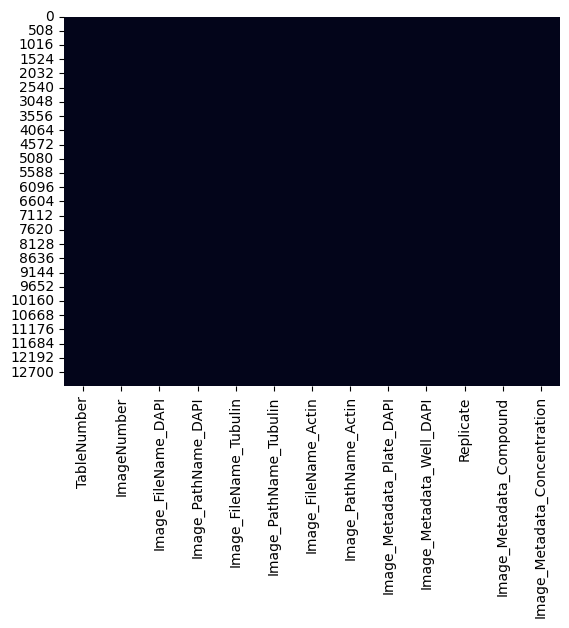

In [25]:
#plot missingness
import seaborn as sns
sns.heatmap(metadata.isnull(), cbar=False)